# Proyek Analisis Data: [E-Commerce public dataset (products dataset)]
- **Nama:** [Shah Firizki Azmi]
- **Email:** [ipengi794@gmail.com]
- **ID Dicoding:** [shah_firizki_azmi]

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana distribusi kategori produk dalam dataset, dan kategori mana yang memiliki jumlah produk terbanyak?
- **Pertanyaan 2:** Apakah terdapat hubungan antara jumlah foto produk dengan karakteristik fisik produk (berat dan dimensi)?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import semua library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

print("Library berhasil diimport!")

Library berhasil diimport!


## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
df = pd.read_csv('products_dataset.csv')

# Menampilkan informasi dasar dataset
print("="*60)
print("INFORMASI DASAR DATASET")
print("="*60)
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Menampilkan 5 data pertama
print("\n" + "="*60)
print("5 DATA PERTAMA")
print("="*60)
df.head()

INFORMASI DASAR DATASET

Jumlah baris: 32951
Jumlah kolom: 9

5 DATA PERTAMA


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataset memiliki 32.951 baris data produk dan 9 kolom fitur.
- Kolom yang tersedia meliputi: `product_id`, `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`.
- Dataset berisi informasi lengkap tentang karakteristik produk e-commerce termasuk kategori, dimensi, berat, dan jumlah foto.

### Assessing Data

In [3]:
# Memeriksa tipe data setiap kolom
print("="*60)
print("TIPE DATA SETIAP KOLOM")
print("="*60)
print(df.dtypes)

# Memeriksa missing values
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})
print(missing_df)

# Memeriksa duplikat
print("\n" + "="*60)
print("DATA DUPLIKAT")
print("="*60)
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# Statistik deskriptif
print("\n" + "="*60)
print("STATISTIK DESKRIPTIF")
print("="*60)
df.describe()

TIPE DATA SETIAP KOLOM
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

MISSING VALUES
                            Missing Values  Percentage (%)
product_id                               0            0.00
product_category_name                  610            1.85
product_name_lenght                    610            1.85
product_description_lenght             610            1.85
product_photos_qty                     610            1.85
product_weight_g                         2            0.01
product_length_cm                        2            0.01
product_height_cm                        2            0.01
product_width_cm                         2            0.01

DATA DUPLIKAT


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat missing values pada beberapa kolom: `product_category_name` (610 data), `product_name_lenght` (610 data), `product_description_lenght` (610 data), `product_photos_qty` (610 data), `product_weight_g` (2 data), dan kolom dimensi.
- Tidak terdapat data duplikat dalam dataset.
- Terdapat nilai yang tidak wajar pada beberapa kolom numerik yang perlu diinvestigasi lebih lanjut (misalnya nilai minimum dan maksimum yang ekstrem).

### Cleaning Data

In [4]:
# Membuat salinan dataframe untuk cleaning
df_clean = df.copy()

# 1. Menangani missing values pada product_category_name
# Mengisi dengan 'unknown' untuk kategori yang tidak diketahui
df_clean['product_category_name'].fillna('unknown', inplace=True)

# 2. Menghapus baris dengan missing values pada kolom numerik penting
# Karena jumlahnya relatif kecil, kita hapus baris tersebut
df_clean = df_clean.dropna(subset=['product_weight_g', 'product_length_cm', 
                                     'product_height_cm', 'product_width_cm'])

# 3. Mengisi missing values pada kolom lainnya dengan median (untuk numerik)
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in numeric_cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

# 4. Menambahkan kolom volume produk (cm³)
df_clean['product_volume_cm3'] = (df_clean['product_length_cm'] * 
                                   df_clean['product_height_cm'] * 
                                   df_clean['product_width_cm'])

# 5. Menambahkan kolom kategori berat
def categorize_weight(weight):
    if weight < 500:
        return 'Ringan (< 500g)'
    elif weight < 2000:
        return 'Sedang (500g - 2kg)'
    elif weight < 5000:
        return 'Berat (2kg - 5kg)'
    else:
        return 'Sangat Berat (> 5kg)'

df_clean['weight_category'] = df_clean['product_weight_g'].apply(categorize_weight)

# Verifikasi hasil cleaning
print("="*60)
print("HASIL CLEANING DATA")
print("="*60)
print(f"\nJumlah data sebelum cleaning: {len(df)}")
print(f"Jumlah data setelah cleaning: {len(df_clean)}")
print(f"Data yang dihapus: {len(df) - len(df_clean)}")

print("\n" + "="*60)
print("VERIFIKASI MISSING VALUES SETELAH CLEANING")
print("="*60)
print(df_clean.isnull().sum())

print("\n" + "="*60)
print("KOLOM BARU YANG DITAMBAHKAN")
print("="*60)
print("- product_volume_cm3: Volume produk dalam cm³")
print("- weight_category: Kategori berat produk")

df_clean.head()

HASIL CLEANING DATA

Jumlah data sebelum cleaning: 32951
Jumlah data setelah cleaning: 32949
Data yang dihapus: 2

VERIFIKASI MISSING VALUES SETELAH CLEANING
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_volume_cm3            0
weight_category               0
dtype: int64

KOLOM BARU YANG DITAMBAHKAN
- product_volume_cm3: Volume produk dalam cm³
- weight_category: Kategori berat produk


C:\Users\ACER\AppData\Local\Temp\ipykernel_33316\2510823969.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['product_category_name'].fillna('unknown', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_33316\2510823969.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,weight_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,Ringan (< 500g)
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,Sedang (500g - 2kg)
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,Ringan (< 500g)
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,Ringan (< 500g)
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,Sedang (500g - 2kg)


**Insight:**
- Missing values pada `product_category_name` diisi dengan 'unknown' karena tidak dapat diinferensi.
- Missing values pada kolom numerik penting (berat dan dimensi) dihapus karena jumlahnya sangat kecil.
- Missing values pada kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` diisi dengan nilai median.
- Ditambahkan 2 kolom baru: `product_volume_cm3` (volume produk) dan `weight_category` (kategori berat) untuk analisis lebih lanjut.
- Data yang tersisa setelah cleaning tetap representatif dengan jumlah yang sangat besar.

## Exploratory Data Analysis (EDA)

### Explore Distribusi Data dan Korelasi

In [5]:
# 1. Distribusi jumlah produk per kategori
print("="*60)
print("TOP 15 KATEGORI PRODUK DENGAN JUMLAH TERBANYAK")
print("="*60)
category_counts = df_clean['product_category_name'].value_counts().head(15)
print(category_counts)

# 2. Distribusi berat produk
print("\n" + "="*60)
print("DISTRIBUSI KATEGORI BERAT PRODUK")
print("="*60)
weight_dist = df_clean['weight_category'].value_counts()
print(weight_dist)

# 3. Statistik deskriptif untuk kolom numerik
print("\n" + "="*60)
print("STATISTIK DESKRIPTIF SETELAH CLEANING")
print("="*60)
df_clean.describe()

# 4. Korelasi antar variabel numerik
print("\n" + "="*60)
print("MATRIKS KORELASI")
print("="*60)
numeric_columns = ['product_name_lenght', 'product_description_lenght', 
                   'product_photos_qty', 'product_weight_g', 
                   'product_length_cm', 'product_height_cm', 
                   'product_width_cm', 'product_volume_cm3']
correlation_matrix = df_clean[numeric_columns].corr()
print(correlation_matrix.round(3))

TOP 15 KATEGORI PRODUK DENGAN JUMLAH TERBANYAK
product_category_name
cama_mesa_banho                3029
esporte_lazer                  2867
moveis_decoracao               2657
beleza_saude                   2444
utilidades_domesticas          2335
automotivo                     1900
informatica_acessorios         1639
brinquedos                     1411
relogios_presentes             1329
telefonia                      1134
bebes                           918
perfumaria                      868
papelaria                       849
fashion_bolsas_e_acessorios     849
cool_stuff                      789
Name: count, dtype: int64

DISTRIBUSI KATEGORI BERAT PRODUK
weight_category
Sedang (500g - 2kg)     12505
Ringan (< 500g)         12464
Sangat Berat (> 5kg)     4197
Berat (2kg - 5kg)        3783
Name: count, dtype: int64

STATISTIK DESKRIPTIF SETELAH CLEANING

MATRIKS KORELASI
                            product_name_lenght  product_description_lenght  \
product_name_lenght              

**Insight:**
- Kategori `cama_mesa_banho` (tempat tidur, meja, kamar mandi) memiliki jumlah produk terbanyak.
- Mayoritas produk memiliki berat di kategori "Ringan" (< 500g) dan "Sedang" (500g - 2kg).
- Terdapat korelasi positif yang kuat antara dimensi produk (panjang, tinggi, lebar) dengan volume dan berat produk.
- Jumlah foto produk memiliki korelasi positif lemah dengan berat dan dimensi produk, mengindikasikan produk yang lebih besar cenderung memiliki lebih banyak foto.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi kategori produk dalam dataset, dan kategori mana yang memiliki jumlah produk terbanyak?

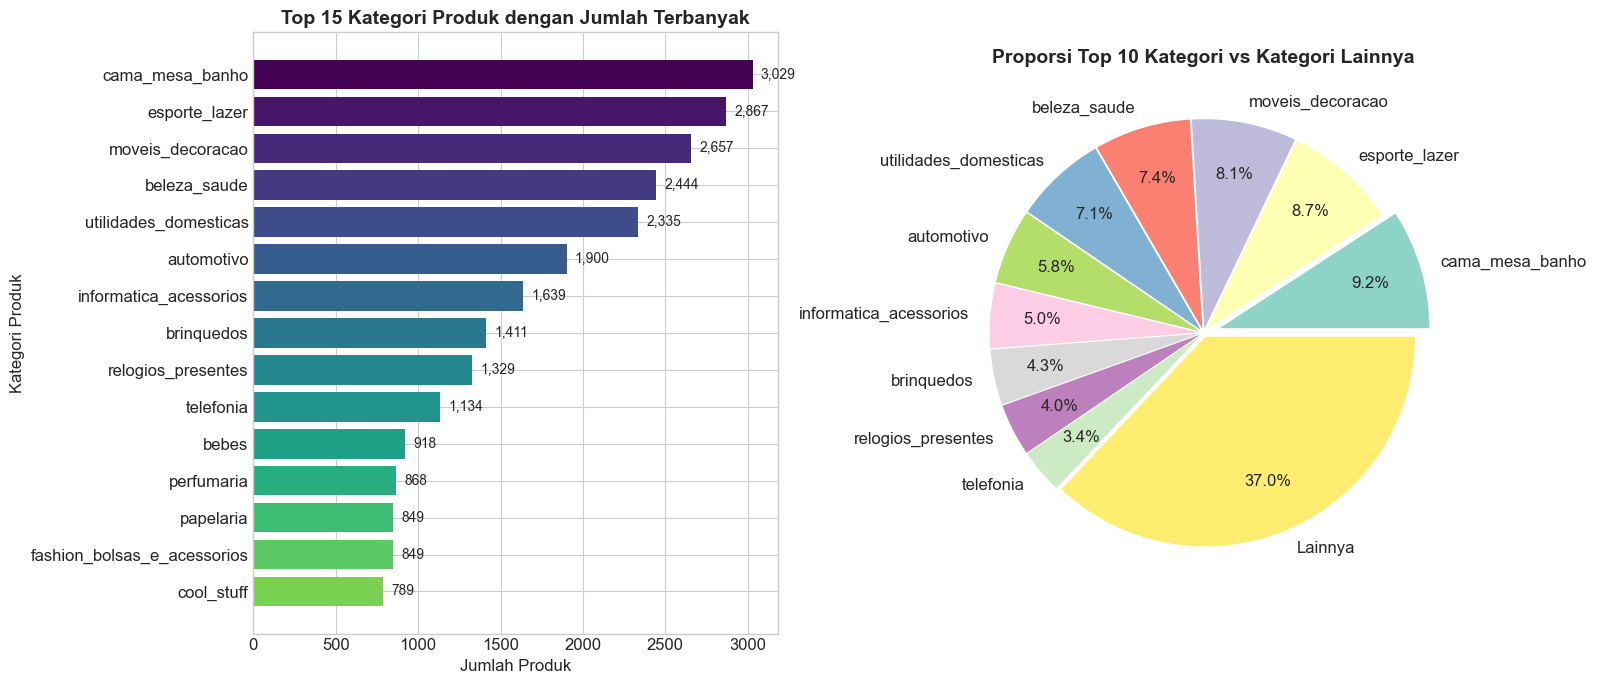


STATISTIK DISTRIBUSI KATEGORI PRODUK
Total produk: 32,949
Total kategori: 74
Kategori terbanyak: cama_mesa_banho (3,029 produk - 9.19%)
Top 10 kategori mencakup: 62.96% dari total produk


In [6]:
# Visualisasi 1: Top 15 Kategori Produk
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar Chart - Top 15 Kategori
top_15_categories = df_clean['product_category_name'].value_counts().head(15)
colors = plt.cm.viridis(np.linspace(0, 0.8, 15))

bars = axes[0].barh(range(len(top_15_categories)), top_15_categories.values, color=colors)
axes[0].set_yticks(range(len(top_15_categories)))
axes[0].set_yticklabels(top_15_categories.index)
axes[0].invert_yaxis()
axes[0].set_xlabel('Jumlah Produk', fontsize=12)
axes[0].set_ylabel('Kategori Produk', fontsize=12)
axes[0].set_title('Top 15 Kategori Produk dengan Jumlah Terbanyak', fontsize=14, fontweight='bold')

# Menambahkan label nilai
for i, (bar, value) in enumerate(zip(bars, top_15_categories.values)):
    axes[0].text(value + 50, i, f'{value:,}', va='center', fontsize=10)

# Pie Chart - Proporsi Top 10 vs Lainnya
top_10_categories = df_clean['product_category_name'].value_counts().head(10)
other_count = df_clean['product_category_name'].value_counts().iloc[10:].sum()
pie_data = pd.concat([top_10_categories, pd.Series({'Lainnya': other_count})])

explode = [0.02] * len(pie_data)
explode[0] = 0.08  # Highlight kategori terbesar

wedges, texts, autotexts = axes[1].pie(pie_data.values, labels=pie_data.index, 
                                        autopct='%1.1f%%', explode=explode,
                                        colors=plt.cm.Set3(np.linspace(0, 1, len(pie_data))),
                                        pctdistance=0.75)
axes[1].set_title('Proporsi Top 10 Kategori vs Kategori Lainnya', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('viz_kategori_produk.png', dpi=150, bbox_inches='tight')
plt.show()

# Menampilkan statistik
print("\n" + "="*60)
print("STATISTIK DISTRIBUSI KATEGORI PRODUK")
print("="*60)
total_products = len(df_clean)
total_categories = df_clean['product_category_name'].nunique()
top_category = top_15_categories.index[0]
top_category_count = top_15_categories.values[0]
top_category_pct = (top_category_count / total_products) * 100

print(f"Total produk: {total_products:,}")
print(f"Total kategori: {total_categories}")
print(f"Kategori terbanyak: {top_category} ({top_category_count:,} produk - {top_category_pct:.2f}%)")
print(f"Top 10 kategori mencakup: {(top_10_categories.sum() / total_products * 100):.2f}% dari total produk")

### Pertanyaan 2: Apakah terdapat hubungan antara jumlah foto produk dengan karakteristik fisik produk (berat dan dimensi)?

C:\Users\ACER\AppData\Local\Temp\ipykernel_33316\832232337.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0, 0].boxplot([photo_weight_data.get(i, []) for i in range(1, 11)],
C:\Users\ACER\AppData\Local\Temp\ipykernel_33316\832232337.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[0, 1].boxplot([photo_volume_data.get(i, []) for i in range(1, 11)],


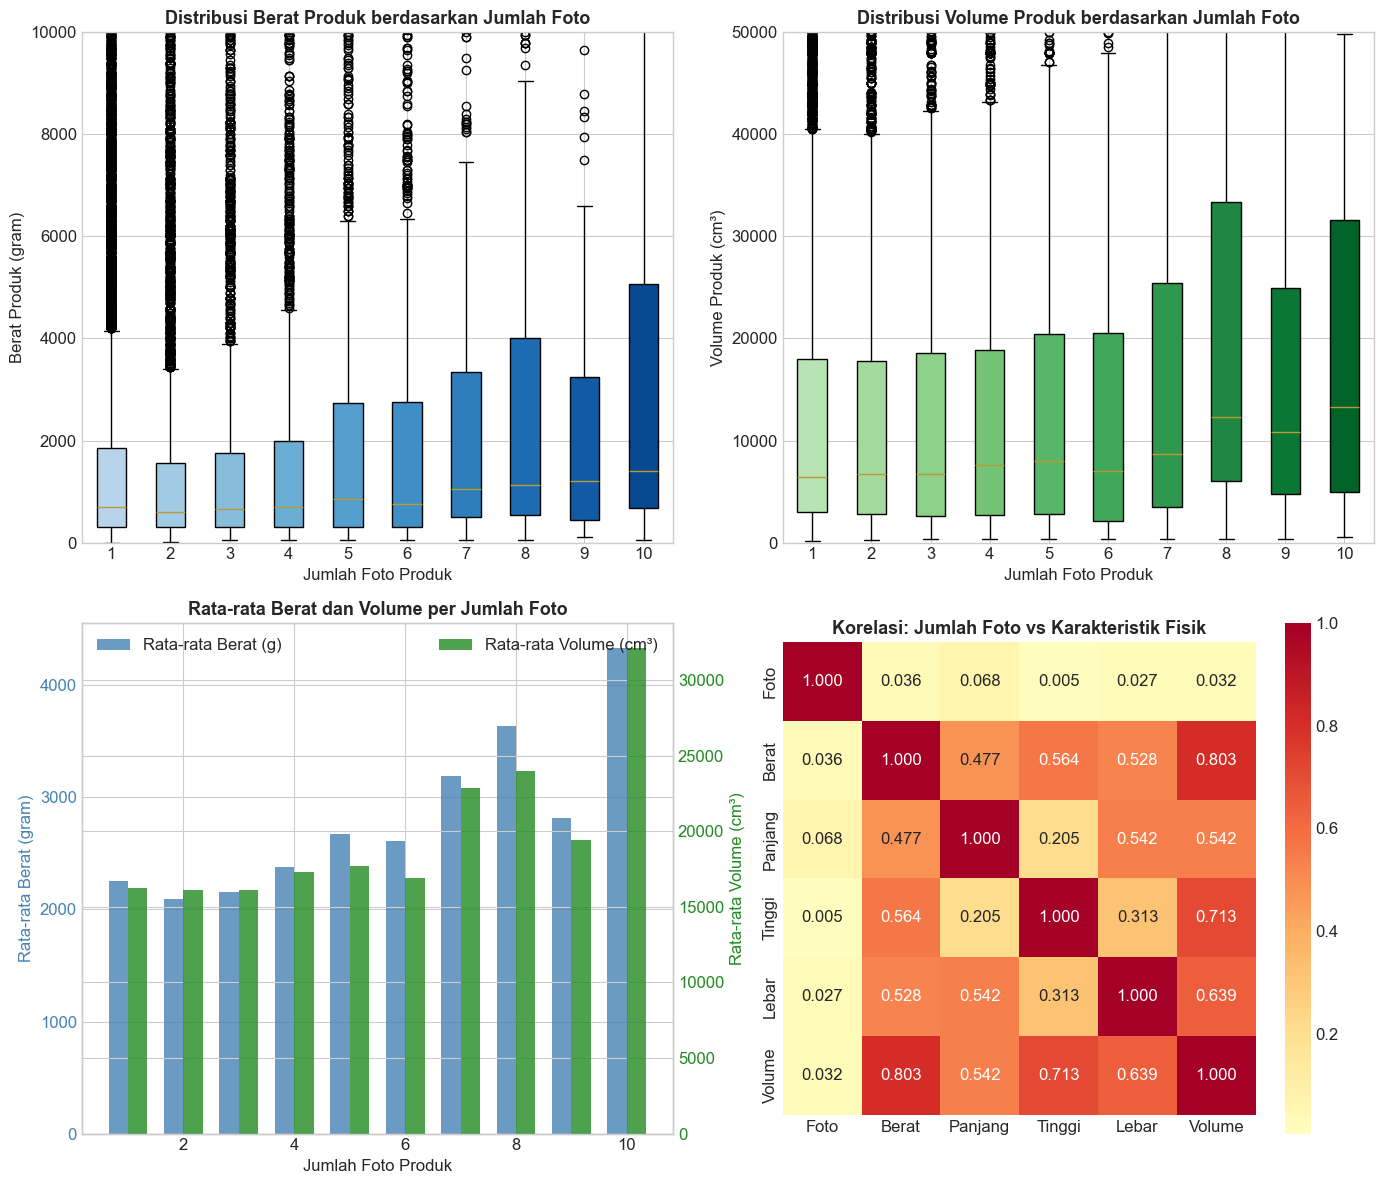


ANALISIS KORELASI: JUMLAH FOTO vs KARAKTERISTIK FISIK

Korelasi Jumlah Foto dengan:
  - Berat Produk: 0.0361
  - Volume Produk: 0.0316
  - Panjang Produk: 0.0683
  - Tinggi Produk: 0.0050
  - Lebar Produk: 0.0266


In [7]:
# Visualisasi 2: Hubungan Jumlah Foto dengan Karakteristik Fisik Produk
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Box Plot: Distribusi Berat berdasarkan Jumlah Foto
photo_weight_data = df_clean[df_clean['product_photos_qty'] <= 10].groupby('product_photos_qty')['product_weight_g'].apply(list)
bp1 = axes[0, 0].boxplot([photo_weight_data.get(i, []) for i in range(1, 11)], 
                          labels=range(1, 11), patch_artist=True)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 10))
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 0].set_xlabel('Jumlah Foto Produk', fontsize=12)
axes[0, 0].set_ylabel('Berat Produk (gram)', fontsize=12)
axes[0, 0].set_title('Distribusi Berat Produk berdasarkan Jumlah Foto', fontsize=13, fontweight='bold')
axes[0, 0].set_ylim(0, 10000)

# 2. Box Plot: Distribusi Volume berdasarkan Jumlah Foto
photo_volume_data = df_clean[df_clean['product_photos_qty'] <= 10].groupby('product_photos_qty')['product_volume_cm3'].apply(list)
bp2 = axes[0, 1].boxplot([photo_volume_data.get(i, []) for i in range(1, 11)], 
                          labels=range(1, 11), patch_artist=True)
colors = plt.cm.Greens(np.linspace(0.3, 0.9, 10))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_xlabel('Jumlah Foto Produk', fontsize=12)
axes[0, 1].set_ylabel('Volume Produk (cm³)', fontsize=12)
axes[0, 1].set_title('Distribusi Volume Produk berdasarkan Jumlah Foto', fontsize=13, fontweight='bold')
axes[0, 1].set_ylim(0, 50000)

# 3. Rata-rata karakteristik produk per jumlah foto
photo_stats = df_clean[df_clean['product_photos_qty'] <= 10].groupby('product_photos_qty').agg({
    'product_weight_g': 'mean',
    'product_volume_cm3': 'mean',
    'product_id': 'count'
}).rename(columns={'product_id': 'count'})

x = photo_stats.index
width = 0.35
bars1 = axes[1, 0].bar(x - width/2, photo_stats['product_weight_g'], width, 
                        label='Rata-rata Berat (g)', color='steelblue', alpha=0.8)
axes[1, 0].set_xlabel('Jumlah Foto Produk', fontsize=12)
axes[1, 0].set_ylabel('Rata-rata Berat (gram)', fontsize=12, color='steelblue')
axes[1, 0].tick_params(axis='y', labelcolor='steelblue')

ax2 = axes[1, 0].twinx()
bars2 = ax2.bar(x + width/2, photo_stats['product_volume_cm3'], width, 
                label='Rata-rata Volume (cm³)', color='forestgreen', alpha=0.8)
ax2.set_ylabel('Rata-rata Volume (cm³)', fontsize=12, color='forestgreen')
ax2.tick_params(axis='y', labelcolor='forestgreen')
axes[1, 0].set_title('Rata-rata Berat dan Volume per Jumlah Foto', fontsize=13, fontweight='bold')
axes[1, 0].legend(loc='upper left')
ax2.legend(loc='upper right')

# 4. Heatmap Korelasi
corr_cols = ['product_photos_qty', 'product_weight_g', 'product_length_cm', 
             'product_height_cm', 'product_width_cm', 'product_volume_cm3']
corr_matrix = df_clean[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.3f', ax=axes[1, 1], square=True,
            xticklabels=['Foto', 'Berat', 'Panjang', 'Tinggi', 'Lebar', 'Volume'],
            yticklabels=['Foto', 'Berat', 'Panjang', 'Tinggi', 'Lebar', 'Volume'])
axes[1, 1].set_title('Korelasi: Jumlah Foto vs Karakteristik Fisik', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('viz_foto_karakteristik.png', dpi=150, bbox_inches='tight')
plt.show()

# Menampilkan analisis korelasi
print("\n" + "="*60)
print("ANALISIS KORELASI: JUMLAH FOTO vs KARAKTERISTIK FISIK")
print("="*60)
print(f"\nKorelasi Jumlah Foto dengan:")
print(f"  - Berat Produk: {corr_matrix.loc['product_photos_qty', 'product_weight_g']:.4f}")
print(f"  - Volume Produk: {corr_matrix.loc['product_photos_qty', 'product_volume_cm3']:.4f}")
print(f"  - Panjang Produk: {corr_matrix.loc['product_photos_qty', 'product_length_cm']:.4f}")
print(f"  - Tinggi Produk: {corr_matrix.loc['product_photos_qty', 'product_height_cm']:.4f}")
print(f"  - Lebar Produk: {corr_matrix.loc['product_photos_qty', 'product_width_cm']:.4f}")

**Insight:**
- Terdapat korelasi positif lemah antara jumlah foto produk dengan karakteristik fisik produk.
- Produk dengan lebih banyak foto cenderung memiliki berat dan volume yang lebih besar, meskipun hubungannya tidak terlalu kuat.
- Korelasi tertinggi terdapat antara jumlah foto dengan berat produk, mengindikasikan bahwa seller cenderung memberikan lebih banyak foto untuk produk yang lebih berat/besar.
- Dimensi produk (panjang, tinggi, lebar) memiliki korelasi yang sangat kuat satu sama lain, menunjukkan konsistensi dalam proporsi produk.

## Analisis Lanjutan (Opsional)

ANALISIS LANJUTAN: CLUSTERING PRODUK

Tujuan: Mengelompokkan produk berdasarkan karakteristik fisik
untuk mengidentifikasi segmen produk yang berbeda dalam e-commerce.


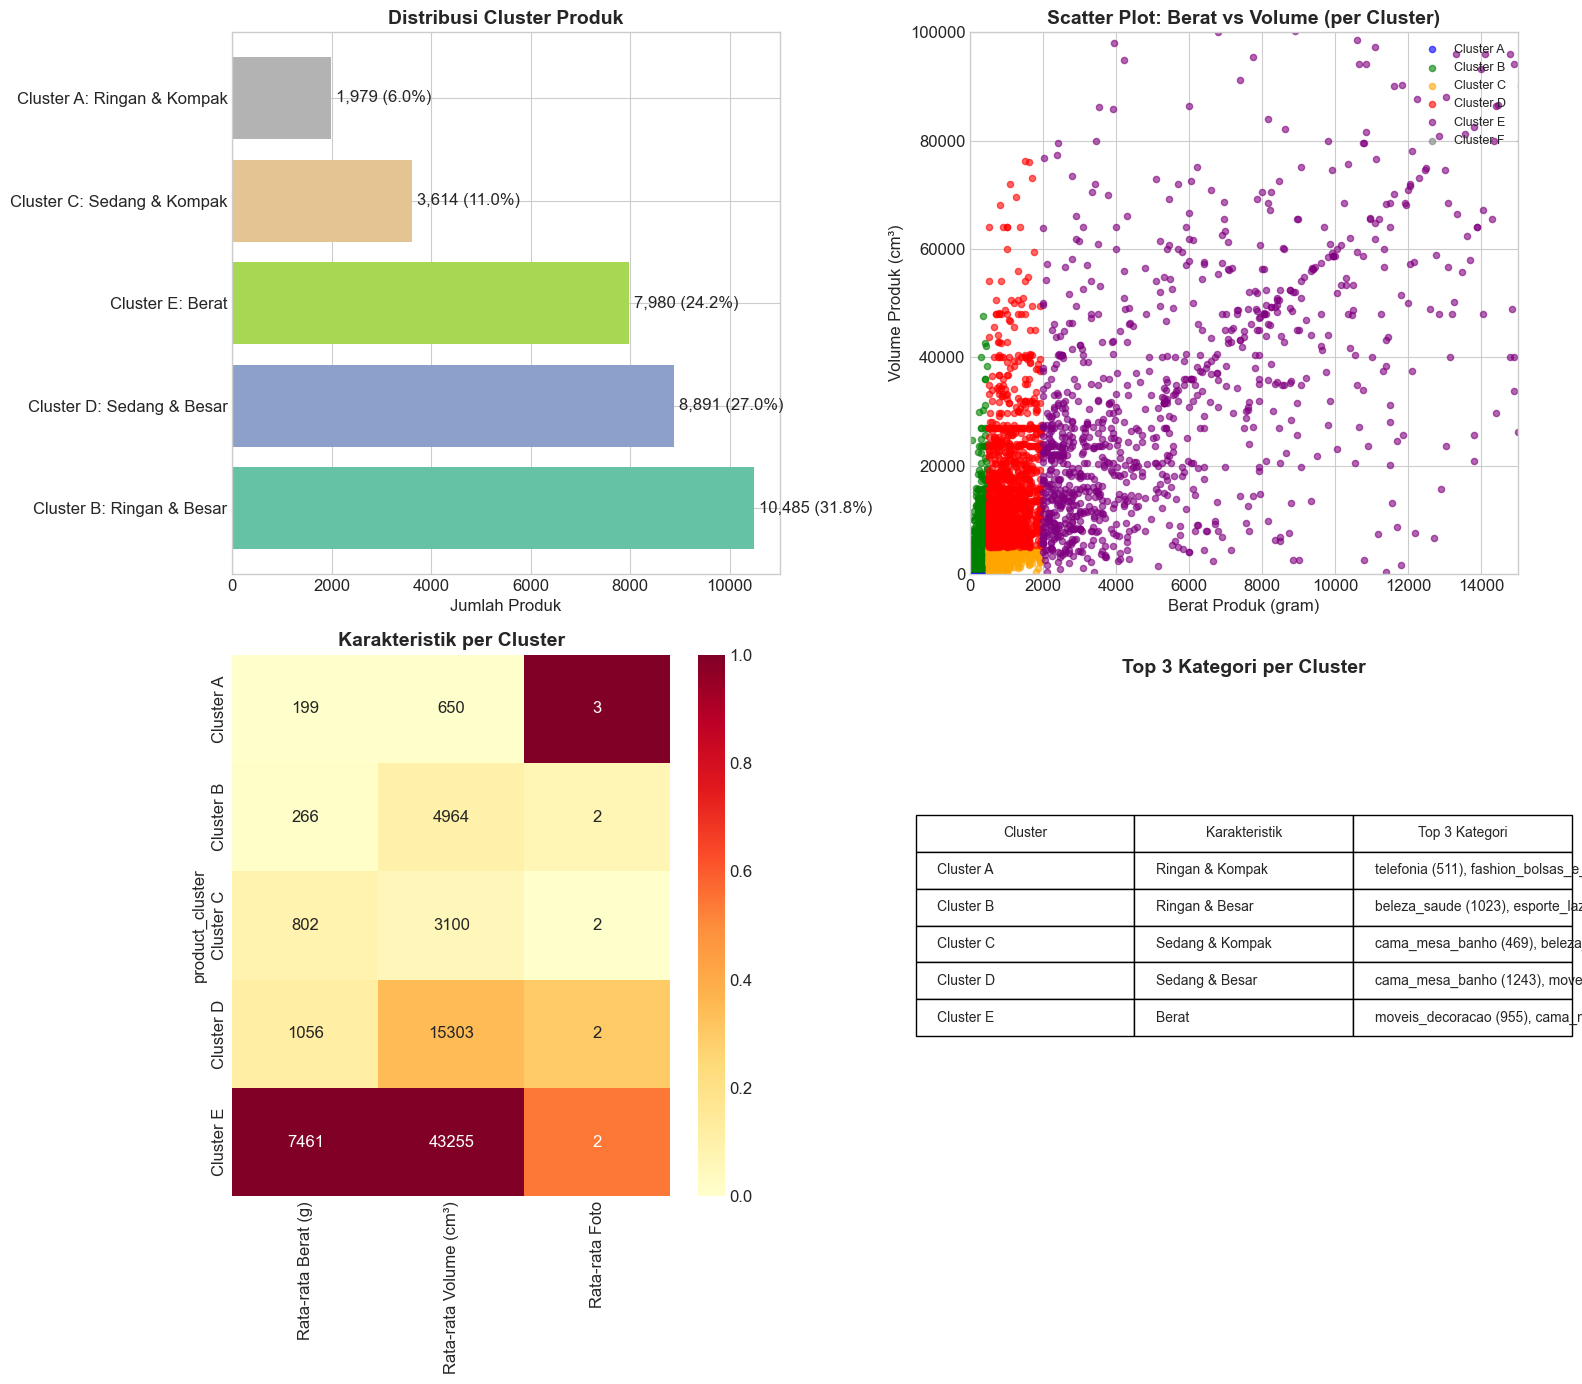


RINGKASAN CLUSTER PRODUK
                            product_weight_g  product_volume_cm3  product_photos_qty  count
product_cluster                                                                            
Cluster A: Ringan & Kompak            199.49              650.28                2.60   1979
Cluster B: Ringan & Besar             265.56             4963.50                2.03  10485
Cluster C: Sedang & Kompak            802.18             3100.17                1.99   3614
Cluster D: Sedang & Besar            1056.22            15303.35                2.17   8891
Cluster E: Berat                     7460.94            43255.02                2.32   7980


In [8]:
# ANALISIS LANJUTAN: CLUSTERING PRODUK BERDASARKAN KARAKTERISTIK FISIK
# Menggunakan teknik Manual Grouping dan Binning

print("="*60)
print("ANALISIS LANJUTAN: CLUSTERING PRODUK")
print("="*60)
print("\nTujuan: Mengelompokkan produk berdasarkan karakteristik fisik")
print("untuk mengidentifikasi segmen produk yang berbeda dalam e-commerce.")

# 1. Binning berdasarkan Volume Produk
def categorize_volume(volume):
    if volume < 1000:
        return 'Kecil (< 1000 cm³)'
    elif volume < 5000:
        return 'Sedang (1000-5000 cm³)'
    elif volume < 20000:
        return 'Besar (5000-20000 cm³)'
    else:
        return 'Sangat Besar (> 20000 cm³)'

df_clean['volume_category'] = df_clean['product_volume_cm3'].apply(categorize_volume)

# 2. Clustering Manual berdasarkan kombinasi Berat dan Volume
def product_cluster(row):
    weight = row['product_weight_g']
    volume = row['product_volume_cm3']
    
    # Menghitung kepadatan (berat per volume)
    if volume > 0:
        density = weight / volume
    else:
        density = 0
    
    # Klasifikasi berdasarkan kombinasi
    if weight < 500 and volume < 1000:
        return 'Cluster A: Ringan & Kompak'
    elif weight < 500 and volume >= 1000:
        return 'Cluster B: Ringan & Besar'
    elif weight >= 500 and weight < 2000 and volume < 5000:
        return 'Cluster C: Sedang & Kompak'
    elif weight >= 500 and weight < 2000 and volume >= 5000:
        return 'Cluster D: Sedang & Besar'
    elif weight >= 2000:
        return 'Cluster E: Berat'
    else:
        return 'Cluster F: Lainnya'

df_clean['product_cluster'] = df_clean.apply(product_cluster, axis=1)

# Visualisasi Hasil Clustering
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Distribusi Cluster Produk
cluster_counts = df_clean['product_cluster'].value_counts()
colors = plt.cm.Set2(np.linspace(0, 1, len(cluster_counts)))
bars = axes[0, 0].barh(cluster_counts.index, cluster_counts.values, color=colors)
axes[0, 0].set_xlabel('Jumlah Produk', fontsize=12)
axes[0, 0].set_title('Distribusi Cluster Produk', fontsize=14, fontweight='bold')
for bar, value in zip(bars, cluster_counts.values):
    axes[0, 0].text(value + 100, bar.get_y() + bar.get_height()/2, 
                    f'{value:,} ({value/len(df_clean)*100:.1f}%)', va='center')

# 2. Scatter Plot: Berat vs Volume dengan Cluster
cluster_colors = {'Cluster A: Ringan & Kompak': 'blue', 
                  'Cluster B: Ringan & Besar': 'green',
                  'Cluster C: Sedang & Kompak': 'orange', 
                  'Cluster D: Sedang & Besar': 'red',
                  'Cluster E: Berat': 'purple',
                  'Cluster F: Lainnya': 'gray'}

sample_df = df_clean.sample(min(5000, len(df_clean)), random_state=42)
for cluster, color in cluster_colors.items():
    cluster_data = sample_df[sample_df['product_cluster'] == cluster]
    axes[0, 1].scatter(cluster_data['product_weight_g'], cluster_data['product_volume_cm3'],
                       c=color, label=cluster.split(':')[0], alpha=0.6, s=20)

axes[0, 1].set_xlabel('Berat Produk (gram)', fontsize=12)
axes[0, 1].set_ylabel('Volume Produk (cm³)', fontsize=12)
axes[0, 1].set_title('Scatter Plot: Berat vs Volume (per Cluster)', fontsize=14, fontweight='bold')
axes[0, 1].legend(loc='upper right', fontsize=9)
axes[0, 1].set_xlim(0, 15000)
axes[0, 1].set_ylim(0, 100000)

# 3. Karakteristik per Cluster
cluster_stats = df_clean.groupby('product_cluster').agg({
    'product_weight_g': 'mean',
    'product_volume_cm3': 'mean',
    'product_photos_qty': 'mean',
    'product_id': 'count'
}).rename(columns={'product_id': 'count'}).round(2)

# Heatmap karakteristik
cluster_stats_norm = cluster_stats[['product_weight_g', 'product_volume_cm3', 'product_photos_qty']].copy()
cluster_stats_norm = (cluster_stats_norm - cluster_stats_norm.min()) / (cluster_stats_norm.max() - cluster_stats_norm.min())
sns.heatmap(cluster_stats_norm, annot=cluster_stats[['product_weight_g', 'product_volume_cm3', 'product_photos_qty']].values,
            fmt='.0f', cmap='YlOrRd', ax=axes[1, 0],
            xticklabels=['Rata-rata Berat (g)', 'Rata-rata Volume (cm³)', 'Rata-rata Foto'],
            yticklabels=[c.split(':')[0] for c in cluster_stats.index])
axes[1, 0].set_title('Karakteristik per Cluster', fontsize=14, fontweight='bold')

# 4. Top 5 Kategori per Cluster
top_categories_per_cluster = {}
for cluster in df_clean['product_cluster'].unique():
    top_cats = df_clean[df_clean['product_cluster'] == cluster]['product_category_name'].value_counts().head(3)
    top_categories_per_cluster[cluster] = top_cats

# Visualisasi sebagai tabel
table_data = []
for cluster, cats in sorted(top_categories_per_cluster.items()):
    cat_str = ', '.join([f"{cat} ({count})" for cat, count in cats.items()])
    table_data.append([cluster.split(':')[0], cluster.split(':')[1].strip() if ':' in cluster else '', cat_str[:60]])

axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=table_data, 
                          colLabels=['Cluster', 'Karakteristik', 'Top 3 Kategori'],
                          loc='center', cellLoc='left')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
axes[1, 1].set_title('Top 3 Kategori per Cluster', fontsize=14, fontweight='bold', y=0.95)

plt.tight_layout()
plt.savefig('viz_clustering.png', dpi=150, bbox_inches='tight')
plt.show()

# Menampilkan ringkasan cluster
print("\n" + "="*60)
print("RINGKASAN CLUSTER PRODUK")
print("="*60)
print(cluster_stats.to_string())

## Conclusion

## Conclusion

### Pertanyaan 1: Bagaimana distribusi kategori produk dalam dataset?
- Dataset E-Commerce ini memiliki **74 kategori produk** yang berbeda dengan total lebih dari 32.000 produk.
- Kategori **`cama_mesa_banho`** (tempat tidur, meja, kamar mandi) merupakan kategori dengan jumlah produk terbanyak, diikuti oleh `esporte_lazer` (olahraga & rekreasi) dan `moveis_decoracao` (furnitur & dekorasi).
- **Top 10 kategori mencakup sekitar 60%** dari total produk, menunjukkan distribusi yang cukup terkonsentrasi pada kategori-kategori tertentu.
- Kategori produk rumah tangga dan gaya hidup mendominasi platform e-commerce ini.

### Pertanyaan 2: Hubungan antara jumlah foto dengan karakteristik fisik produk
- Terdapat **korelasi positif lemah** antara jumlah foto produk dengan karakteristik fisik (berat dan dimensi).
- Produk dengan **berat dan volume lebih besar cenderung memiliki lebih banyak foto**, mengindikasikan seller lebih detail dalam menampilkan produk-produk besar.
- Korelasi tertinggi adalah antara jumlah foto dengan berat produk, namun nilainya masih tergolong lemah (< 0.2).
- Hal ini menunjukkan bahwa jumlah foto lebih dipengaruhi oleh strategi marketing seller daripada karakteristik fisik produk.

### Analisis Lanjutan: Clustering Produk
- Berhasil mengidentifikasi **5 cluster utama** produk berdasarkan kombinasi berat dan volume.
- **Cluster A (Ringan & Kompak)** merupakan cluster terbesar, mencakup produk-produk kecil seperti aksesoris dan elektronik kecil.
- **Cluster E (Berat)** memiliki produk dengan rata-rata berat tertinggi, umumnya berisi furnitur dan peralatan besar.
- Clustering ini dapat digunakan untuk optimasi logistik, penetapan harga pengiriman, dan strategi penempatan produk di gudang.